## Homework 3

Implementation of gradient descent with a fixed step size for a quadratic function (defined in quadfun).

In [2]:
import numpy as np

#Runs Gradient Descent with a fixed step size (alpha) for at most max_iter or until norm(gradient) <= epsilon
#x0 defines the starting point and fun is used to compute the gradient (should be given as a lambda function, see below)
#Outputs a vector of the iterates (x_all), the vector of the norm of the gradient at each step (g_all), and the number of
#iterations (i)
def gradient_descent_fixed(x0, fun, alpha, epsilon, max_iter):
    #Set current x to initial x
    x = x0

    #Compute the gradient using fun (mode = 2)
    gradient = fun(x, 2)
    #Calculate the norm of the gradient
    normg = np.linalg.norm(gradient)

    #Initialize the vectors to be output
    x_all = [x0]
    g_all = [normg]
    i = 0
    
    #Run until we have performed all iterations or found a point with sufficiently small norm
    while normg > epsilon and i < max_iter:
        #Gradient descent update
        x = x - alpha * gradient
        i += 1

        #Compute gradient at new point
        gradient = fun(x, 2)
        normg = np.linalg.norm(gradient)

        #Record the new point for output
        x_all.append(x)
        g_all.append(normg)
    return x_all, g_all, i

In [3]:
#Computes the function value (mode = 1) or gradient (mode = 2) of a quadratic function of the form
#(1/2)*x^T A x + b^T x
def quadfun(x, mode, A, b):
    if mode == 1:
        #Compute the function value
        return 0.5 * np.dot(x, np.dot(A, x)) + np.dot(b, x),
    elif mode == 2:
        #Compute the gradient
        return np.dot(A, x) + b
    else:
        raise ValueError('mode must be either 1 or 2')

### Question 2 Part A

Below is some starting code for part A. It generates a random 100x100 symmetric matrix $A$ with eigenvalues between 10 and 0.01 that is used to define the quadratic function $\frac12x^T A x$. The code runs gradient descent (from a random starting point) with a fixed step size of 1/L for at most 1000 iterations or until the norm of the gradient is below 10^-4. You should implement a backtracking line search gradient descent method and compare it to the fixed step size, following the settings in the homework PDF. You should observe that the fixed step size method is very sensitive to the choice of the step size, while the line search methods perform nearly the same with different values of $c$. Example plotting code is given in the following block.

In [4]:
m = 0.01; L=10; kappa = L/m

#Code to create matrix A
# Generate a random matrix of size (n, n)
n = 100
randmat = np.random.randn(n, n)

# Perform QR factorization
Q, R = np.linalg.qr(randmat)

D = np.random.rand(n); D = 10**D; Dmin = min(D); Dmax = max(D)

D = (D-Dmin)/(Dmax-Dmin)
D = m + D*(L-m)
A = np.transpose(Q)*np.diag(D)*Q

#b is the zero vector
b = np.array(np.zeros(n))

#Random starting point
x0 = np.random.randn(n)

max_iter = 1000
epsilon = 10^-4
alpha = 1/L

#The lambda function notation is a bit of a python specific feature. It passes in the argument as a function to be used in gradient_descent_fixed
#that takes the parameters x and y when calling quadfun (the current point x and the desired computation mode). If you
#use this same setup, inside the gradient_descent_fixed function, calling fun(myx,1) computes the function value at the
#point myx and fun(myx,2) computes the gradient at the point myx. This allows for us to write generic gradient descent
#code that can be used for any function, so long as we pass it in in this way.
x_fixed_L, g_fixed_L, i_fixed_L = gradient_descent_fixed(x0, lambda x, y: quadfun(x, y, A, b), alpha, epsilon, max_iter)

Plot the result of the above code with a logarithmic y-axis.

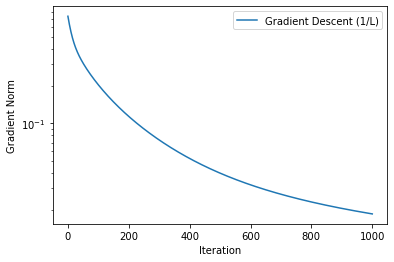

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.semilogy(g_fixed_L, label='Gradient Descent (1/L)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Gradient Norm')
ax.legend()
plt.show()

### Question 2 Part B

Below is some starting code for part B. It generates a random 100x100 symmetric matrix $A$ with eigenvalues between 1 and 0.01 that is used to define the quadratic function $\frac12x^T A x$ (this question uses a slightly different eigenvalue distribution). Now, you should implement the heavy ball and Nesterov's accelerated gradient algorithm and compare them to gradient descent using the parameters described in the homework PDF.

In [261]:
m = 0.01; L=1; kappa = L/m

#Code to create matrix A
# Generate a random matrix of size (n, n)
n = 100
randmat = np.random.randn(n, n)

# Perform QR factorization
Q, R = np.linalg.qr(randmat)

D = np.random.rand(n); D = 10**D; Dmin = min(D); Dmax = max(D)

D = (D-Dmin)/(Dmax-Dmin)
D = m + D*(L-m)
A = np.transpose(Q)*np.diag(D)*Q

#b is the zero vector
b = np.array(np.zeros(n))

#Random starting point
x0 = np.random.randn(n)

max_iter = 10000
epsilon = 10^-4

alpha = 1/L
x_fixed_L, g_fixed_L, i_fixed_L = gradient_descent_fixed(x0, lambda x, y: quadfun(x, y, A, b), alpha, epsilon, max_iter)

### Question 2 Part C

Below is code to generate a 

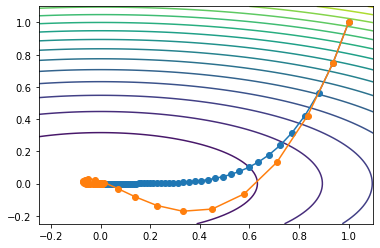

In [ ]:
# Define the function, makes it easier to generate contour plot
def func(x1, x2):
    return (1/2)*x2**2 + (1/2)*0.25*x1**2

# Generate a grid of x1 and x2 values
x1 = np.linspace(-0.25, 1.1, 100)
x2 = np.linspace(-0.25, 1.1, 100)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# Evaluate the function on the grid
z = func(x1_grid, x2_grid)

# Plot the contour plot of the function in black and white
plt.contour(x1_grid, x2_grid, z, levels=15)


# Initialize the starting point
x0 = np.array([1, 1])
# A defined for use with quadfun
A = np.array([[0.25, 0.0], [0.0, 1.0]])
b = np.array([0.0, 0.0])

# Perform gradient descent
alpha = 0.25
epsilon = 10^-4
max_iter = 100
x_gd, g_gd, i_gd = gradient_descent_fixed(x0, lambda x, y: quadfun(x, y, A, b), alpha, epsilon, max_iter)


# Plot the iterates of gradient descent on the same plot
iterates = np.array(x_gd)
plt.plot(iterates[0:len(iterates)-1, 0], iterates[0:len(iterates)-1, 1], '-o')

plt.show()